In [1]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [2]:
from tensorflow.keras.models import Sequential

In [3]:
from tensorflow.keras.layers import Convolution2D

In [4]:
from tensorflow.keras.layers import MaxPooling2D

In [5]:
from tensorflow.keras.layers import Flatten

In [6]:
from tensorflow.keras.layers import Dense

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
Classifier=Sequential()

In [9]:
Classifier.add(Convolution2D(32,3,3,input_shape=(220,220,3),activation='relu'))

Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Convolution2D(128,3,3,activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(256, activation='relu'))
Classifier.add(Dense(3, activation='softmax'))

Classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy','AUC','Precision','Recall','TruePositives','TrueNegatives','FalsePositives','FalseNegatives'])
Classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 73, 73, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 36, 36, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 256)               1

In [10]:
kernels = Classifier.layers[0].kernel

In [11]:
Classifier.layers[0].get_weights()[0]

array([[[[ 0.08068112,  0.07232103,  0.01827426,  0.01838748,
          -0.03192337, -0.00438257,  0.05008644,  0.02010442,
           0.1021895 , -0.03896116, -0.0228023 ,  0.09046604,
          -0.09944966, -0.06923863, -0.00946766, -0.0049873 ,
          -0.1295355 ,  0.06882094,  0.13443823,  0.06707592,
           0.1042241 ,  0.13040479,  0.00034234, -0.09290495,
          -0.07340018,  0.05209887, -0.12288035, -0.09392813,
          -0.0275866 ,  0.03875788,  0.03560236,  0.07933402],
         [ 0.12247328,  0.05219722,  0.01889783, -0.12996076,
           0.1218221 ,  0.03969863,  0.05160244,  0.07451566,
           0.12245868, -0.0338844 , -0.02173394, -0.13541299,
           0.10206515,  0.10604393,  0.04892036, -0.01871736,
          -0.06461931,  0.06442307,  0.03016908, -0.04676229,
          -0.0672186 , -0.13326642, -0.12312611, -0.12954925,
           0.01406431,  0.00738129, -0.01107466,  0.09047249,
           0.02511539,  0.02249484,  0.10225013,  0.12812974],
      

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
print(kernels)

<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
array([[[[ 0.08068112,  0.07232103,  0.01827426,  0.01838748,
          -0.03192337, -0.00438257,  0.05008644,  0.02010442,
           0.1021895 , -0.03896116, -0.0228023 ,  0.09046604,
          -0.09944966, -0.06923863, -0.00946766, -0.0049873 ,
          -0.1295355 ,  0.06882094,  0.13443823,  0.06707592,
           0.1042241 ,  0.13040479,  0.00034234, -0.09290495,
          -0.07340018,  0.05209887, -0.12288035, -0.09392813,
          -0.0275866 ,  0.03875788,  0.03560236,  0.07933402],
         [ 0.12247328,  0.05219722,  0.01889783, -0.12996076,
           0.1218221 ,  0.03969863,  0.05160244,  0.07451566,
           0.12245868, -0.0338844 , -0.02173394, -0.13541299,
           0.10206515,  0.10604393,  0.04892036, -0.01871736,
          -0.06461931,  0.06442307,  0.03016908, -0.04676229,
          -0.0672186 , -0.13326642, -0.12312611, -0.12954925,
           0.01406431,  0.00738129, -0.01107466,  0.090472

In [14]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [15]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [16]:
training_set=train_datagen.flow_from_directory('data/Train',target_size=(220,220),batch_size=32,class_mode='categorical')

Found 340 images belonging to 3 classes.


In [17]:
test_set=test_datagen.flow_from_directory('data/Test',target_size=(220,220),batch_size=32,class_mode='categorical')

Found 84 images belonging to 3 classes.


In [18]:
from IPython.display import display

In [19]:
img_dims = 150
epochs = 100
batch_size = 32

In [20]:
history = Classifier.fit_generator( training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Epoch 1/100
10/10 [==============================] - 23s 2s/step - loss: 1.1288 - accuracy: 0.4448 - auc: 0.5661 - precision: 0.4444 - recall: 0.0649 - true_positives: 20.0000 - true_negatives: 591.0000 - false_positives: 25.0000 - false_negatives: 288.0000 - val_loss: 0.9574 - val_accuracy: 0.4844 - val_auc: 0.7578 - val_precision: 0.9048 - val_recall: 0.2969 - val_true_positives: 19.0000 - val_true_negatives: 126.0000 - val_false_positives: 2.0000 - val_false_negatives: 45.0000
Epoch 2/100
10/10 [==============================] - 14s 1s/step - loss: 0.9882 - accuracy: 0.4935 - auc: 0.7035 - precision: 0.6842 - recall: 0.1688 - true_positives: 52.0000 - true_negatives: 592.0000 - false_positives: 24.0000 - false_negatives: 256.0000 - val_loss: 1.0313 - val_accuracy: 0.3594 - val_auc: 0.6526 - val_precision: 1.0000 - val_recall: 0.0781 - val_true_positives: 5.0000 - val_true_negatives: 128.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 59.0000
Epoch 3/100
10/10 [========

Epoch 18/100
10/10 [==============================] - 13s 1s/step - loss: 0.2216 - accuracy: 0.9286 - auc: 0.9879 - precision: 0.9338 - recall: 0.9156 - true_positives: 282.0000 - true_negatives: 596.0000 - false_positives: 20.0000 - false_negatives: 26.0000 - val_loss: 0.1097 - val_accuracy: 0.9844 - val_auc: 0.9995 - val_precision: 0.9844 - val_recall: 0.9844 - val_true_positives: 63.0000 - val_true_negatives: 127.0000 - val_false_positives: 1.0000 - val_false_negatives: 1.0000
Epoch 19/100
10/10 [==============================] - 6s 639ms/step - loss: 0.1699 - accuracy: 0.9481 - auc: 0.9924 - precision: 0.9510 - recall: 0.9448 - true_positives: 291.0000 - true_negatives: 601.0000 - false_positives: 15.0000 - false_negatives: 17.0000 - val_loss: 0.1316 - val_accuracy: 0.9688 - val_auc: 0.9952 - val_precision: 0.9839 - val_recall: 0.9531 - val_true_positives: 61.0000 - val_true_negatives: 127.0000 - val_false_positives: 1.0000 - val_false_negatives: 3.0000
Epoch 20/100
10/10 [========

Epoch 35/100
10/10 [==============================] - 6s 598ms/step - loss: 0.0964 - accuracy: 0.9643 - auc: 0.9975 - precision: 0.9674 - recall: 0.9643 - true_positives: 297.0000 - true_negatives: 606.0000 - false_positives: 10.0000 - false_negatives: 11.0000 - val_loss: 0.1673 - val_accuracy: 0.9219 - val_auc: 0.9913 - val_precision: 0.9219 - val_recall: 0.9219 - val_true_positives: 59.0000 - val_true_negatives: 123.0000 - val_false_positives: 5.0000 - val_false_negatives: 5.0000
Epoch 36/100
10/10 [==============================] - 6s 618ms/step - loss: 0.0929 - accuracy: 0.9610 - auc: 0.9979 - precision: 0.9610 - recall: 0.9610 - true_positives: 296.0000 - true_negatives: 604.0000 - false_positives: 12.0000 - false_negatives: 12.0000 - val_loss: 0.1168 - val_accuracy: 0.9688 - val_auc: 0.9956 - val_precision: 0.9688 - val_recall: 0.9688 - val_true_positives: 62.0000 - val_true_negatives: 126.0000 - val_false_positives: 2.0000 - val_false_negatives: 2.0000
Epoch 37/100
10/10 [======

Epoch 52/100
10/10 [==============================] - 6s 652ms/step - loss: 0.0511 - accuracy: 0.9870 - auc: 0.9993 - precision: 0.9870 - recall: 0.9870 - true_positives: 304.0000 - true_negatives: 612.0000 - false_positives: 4.0000 - false_negatives: 4.0000 - val_loss: 0.0402 - val_accuracy: 0.9844 - val_auc: 0.9999 - val_precision: 0.9844 - val_recall: 0.9844 - val_true_positives: 63.0000 - val_true_negatives: 127.0000 - val_false_positives: 1.0000 - val_false_negatives: 1.0000
Epoch 53/100
10/10 [==============================] - 6s 671ms/step - loss: 0.0773 - accuracy: 0.9740 - auc: 0.9982 - precision: 0.9740 - recall: 0.9740 - true_positives: 300.0000 - true_negatives: 608.0000 - false_positives: 8.0000 - false_negatives: 8.0000 - val_loss: 0.0884 - val_accuracy: 0.9531 - val_auc: 0.9979 - val_precision: 0.9531 - val_recall: 0.9531 - val_true_positives: 61.0000 - val_true_negatives: 125.0000 - val_false_positives: 3.0000 - val_false_negatives: 3.0000
Epoch 54/100
10/10 [==========

Epoch 69/100
10/10 [==============================] - 8s 792ms/step - loss: 0.0362 - accuracy: 0.9870 - auc: 0.9998 - precision: 0.9902 - recall: 0.9870 - true_positives: 304.0000 - true_negatives: 613.0000 - false_positives: 3.0000 - false_negatives: 4.0000 - val_loss: 0.0346 - val_accuracy: 0.9844 - val_auc: 0.9999 - val_precision: 0.9844 - val_recall: 0.9844 - val_true_positives: 63.0000 - val_true_negatives: 127.0000 - val_false_positives: 1.0000 - val_false_negatives: 1.0000
Epoch 70/100
10/10 [==============================] - 7s 709ms/step - loss: 0.0423 - accuracy: 0.9838 - auc: 0.9995 - precision: 0.9838 - recall: 0.9838 - true_positives: 303.0000 - true_negatives: 611.0000 - false_positives: 5.0000 - false_negatives: 5.0000 - val_loss: 0.0539 - val_accuracy: 0.9844 - val_auc: 0.9993 - val_precision: 0.9841 - val_recall: 0.9688 - val_true_positives: 62.0000 - val_true_negatives: 127.0000 - val_false_positives: 1.0000 - val_false_negatives: 2.0000
Epoch 71/100
10/10 [==========

Epoch 86/100
10/10 [==============================] - 8s 807ms/step - loss: 0.0532 - accuracy: 0.9708 - auc: 0.9990 - precision: 0.9708 - recall: 0.9708 - true_positives: 299.0000 - true_negatives: 607.0000 - false_positives: 9.0000 - false_negatives: 9.0000 - val_loss: 0.0595 - val_accuracy: 0.9688 - val_auc: 0.9990 - val_precision: 0.9688 - val_recall: 0.9688 - val_true_positives: 62.0000 - val_true_negatives: 126.0000 - val_false_positives: 2.0000 - val_false_negatives: 2.0000
Epoch 87/100
10/10 [==============================] - 8s 766ms/step - loss: 0.0651 - accuracy: 0.9740 - auc: 0.9990 - precision: 0.9804 - recall: 0.9740 - true_positives: 300.0000 - true_negatives: 610.0000 - false_positives: 6.0000 - false_negatives: 8.0000 - val_loss: 0.1537 - val_accuracy: 0.9219 - val_auc: 0.9938 - val_precision: 0.9355 - val_recall: 0.9062 - val_true_positives: 58.0000 - val_true_negatives: 124.0000 - val_false_positives: 4.0000 - val_false_negatives: 6.0000
Epoch 88/100
10/10 [==========

In [21]:
print("[INFO] Calculating model scores")
scores = Classifier.evaluate(test_set)

[INFO] Calculating model scores
3/3 [==============================] - 4s 745ms/step - loss: 0.0820 - accuracy: 0.9762 - auc: 0.9981 - precision: 0.9762 - recall: 0.9762 - true_positives: 82.0000 - true_negatives: 166.0000 - false_positives: 2.0000 - false_negatives: 2.0000


In [22]:
precision=scores[3]
recall=scores[4]
true_positives=scores[5]
true_negatives=scores[6]
false_positives=scores[7]
false_negatives=scores[8]

In [47]:
confusion_matrix=[[true_positives,false_positives],[false_negatives,true_negatives]]

In [50]:
print(f"Accuracy                     : {scores[1]*100}")
print("")
print("Confusion Matrix             : ",confusion_matrix)
print("")
print("precision Score              : ",precision)
print("")
print("Recall or Sensitivity Score  : ",recall)
print("")
f1=(precision*recall)/(precision+recall)
F1_Score=2*f1
print("F1 Score                     : ",F1_Score)
print("")
Specificity=true_negatives/(true_negatives+false_positives)
print("Specificity Score            : ",Specificity)

Accuracy                     : 97.6190447807312

Confusion Matrix             :  [[82.0, 2.0], [2.0, 166.0]]

precision Score              :  0.976190447807312

Recall or Sensitivity Score  :  0.976190447807312

F1 Score                     :  0.976190447807312

Specificity Score            :  0.9880952380952381


In [25]:
import h5py

In [26]:
Classifier.save('skin_cancer1.h5')
       

In [27]:
from keras.models import load_model

In [28]:
model=load_model('skin_cancer1.h5')

In [29]:
import numpy as np

In [30]:
from tensorflow.keras.preprocessing import image
test_image=image.load_img('m1.jpg',target_size=(220,220))

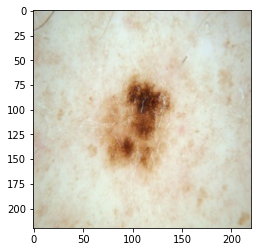

In [31]:
import matplotlib.pyplot as plt
img = plt.imshow(test_image)

In [32]:
test_image=image.load_img('m1.jpg',target_size=(220,220))

In [33]:
test_image=np.expand_dims(test_image,axis=0)

In [34]:
result=Classifier.predict(test_image)

1/1 [==============================] - 0s 461ms/step


In [35]:
prediction = result[0]

In [36]:
classes=training_set.class_indices

In [37]:
classes

{'malignant': 0, 'squamous cell carcinoma': 1, 'vascular lesion': 2}

In [38]:
prediction=list(prediction)

In [39]:
prediction

[1.0, 0.0, 0.0]

In [40]:
classes=['malignant','squamous cell carcinoma','vascular lesion']

In [41]:
output=zip(classes,prediction)
output=dict(output)

In [42]:
output

{'malignant': 1.0, 'squamous cell carcinoma': 0.0, 'vascular lesion': 0.0}

In [43]:
if output["malignant"] == 1.0:
    print("malignant")
elif output["squamous cell carcinoma"] ==1.0:
    print("squamous cell carcinoma")
else:
    print("vascular lesion")

malignant


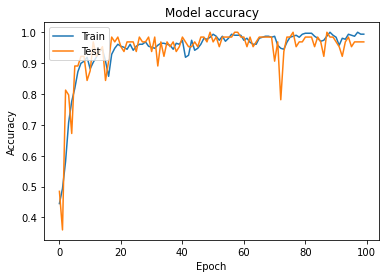

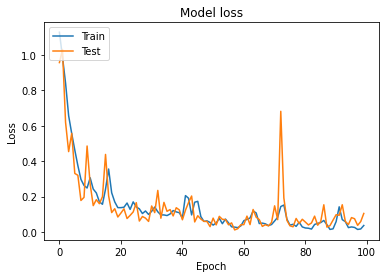

In [44]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
graph()